In [25]:
import pyodbc

# Define the connection details
server = r'DESKTOP-AUCB5FC\SQLEXPRESS'  # Use raw string for backslashes
database = 'MentorMatch'
username = r'DESKTOP-AUCB5FC\SQLEXPRESS'  # Use raw string for backslashes
password = ''  # Leave empty if no password is set

# Establish the connection
try:
    connection = pyodbc.connect(
        f"DRIVER={{ODBC Driver 17 for SQL Server}};"
        f"SERVER={server};"
        f"DATABASE={database};"
        f"Trusted_Connection=yes;"
    )
    print("Connection established successfully!")
except Exception as e:
    print("Failed to connect to the database. Error:", str(e))


Connection established successfully!


In [27]:
import pandas as pd
query = """
SELECT COUNT(ApplicantID)
FROM APPLICANT
"""

try:
    
    applicant_count = pd.read_sql(query, connection)
    print("Total Number of Applicants:")
    print(applicant_count)

except Exception as e:
    print(f"Error while fetching applicant count: {e}")


Total Number of Applicants:
     
0  50


C:\Users\DELL\AppData\Local\Temp\ipykernel_44872\1945447522.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  applicant_count = pd.read_sql(query, connection)


In [29]:
mentor_id = 'M10'

# SQL Query
query = f"""
SELECT SessionSlotID, sessionID, S_ApplicantID AS ApplicantID, Fee, Date
FROM SESSION
WHERE S_MentorID = '{mentor_id}'
"""

try:
    mentor_sessions = pd.read_sql(query, connection)
    print(f"Session Details for Mentor {mentor_id}:")
    print(mentor_sessions)

except Exception as e:
    print(f"Error while fetching session details: {e}")

Session Details for Mentor M10:
   SessionSlotID sessionID ApplicantID   Fee        Date
0           SS18       S16         A42   7.0  2022-08-23
1           SS19       S17         A42   9.0  2022-09-05
2           SS43       S36         A28   5.0  2031-11-06
3           SS53       S45          A7   7.0  2024-07-04
4           SS54       S46          A7   6.0  2024-07-14
5           SS55       S47          A7   7.0  2024-08-31
6           SS61       S53          A1   6.0  2021-06-02
7           SS62       S54          A1  10.0  2021-06-19
8           SS70       S62         A15   6.0  2039-08-23
9           SS71       S63         A15   7.0  2039-09-19
10          SS72       S63          A5   7.0  2039-09-19
11          SS73       S63         A49   7.0  2039-09-19


C:\Users\DELL\AppData\Local\Temp\ipykernel_44872\4028047415.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  mentor_sessions = pd.read_sql(query, connection)


In [31]:
# Replace 'A1' with the specific ApplicantID you want to filter by
applicant_id = 'A5'

# SQL Query
query = f"""
SELECT SessionSlotID, sessionID,S_MentorID AS MentorID, Fee, Date
FROM SESSION
WHERE S_ApplicantID = '{applicant_id}'
"""

try:
    # Execute the query and fetch data
    applicant_sessions = pd.read_sql(query, connection)
    print(f"Session Details for Applicant {applicant_id}:")
    print(applicant_sessions)

except Exception as e:
    print(f"Error while fetching session details: {e}")


Session Details for Applicant A5:
  SessionSlotID sessionID MentorID  Fee        Date
0          SS25       S21       M9  5.0  2025-01-07
1          SS72       S63      M10  7.0  2039-09-19


C:\Users\DELL\AppData\Local\Temp\ipykernel_44872\503394918.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  applicant_sessions = pd.read_sql(query, connection)


C:\Users\DELL\AppData\Local\Temp\ipykernel_44872\3723701665.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  payment_data = pd.read_sql_query(query, connection)


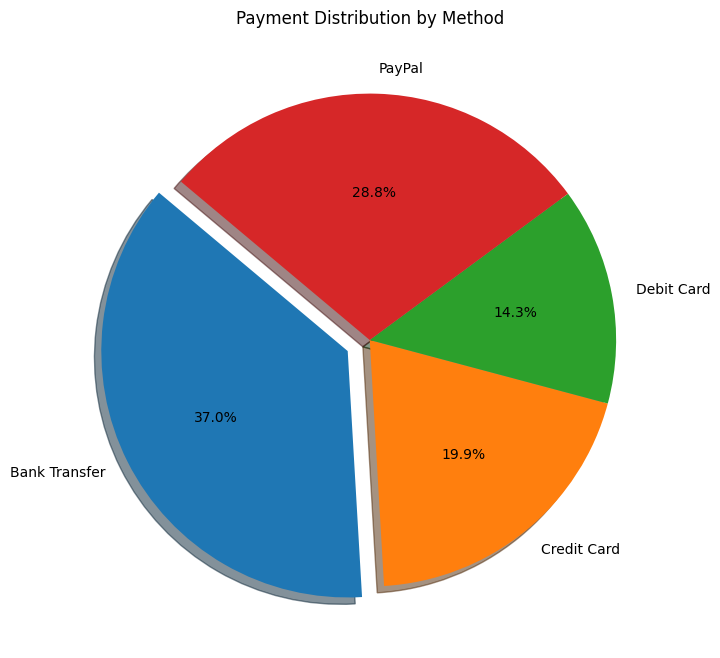

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# SQL Query to fetch payment distribution
query = """
SELECT Method, SUM(Amount) as TotalAmount
FROM PAYMENT
GROUP BY Method
"""

try:
    # Fetch data into a pandas DataFrame
    payment_data = pd.read_sql_query(query, connection)

    # Plotting the Pie Chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        payment_data['TotalAmount'],
        labels=payment_data['Method'],
        autopct='%1.1f%%',
        startangle=140,
        explode=[0.1 if v == max(payment_data['TotalAmount']) else 0 for v in payment_data['TotalAmount']],
        shadow=True
    )
    plt.title("Payment Distribution by Method")
    plt.show()

except Exception as e:
    print(f"Error while fetching data or visualizing: {e}")


C:\Users\DELL\AppData\Local\Temp\ipykernel_44872\4102604835.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  user_data = pd.read_sql(query, connection)


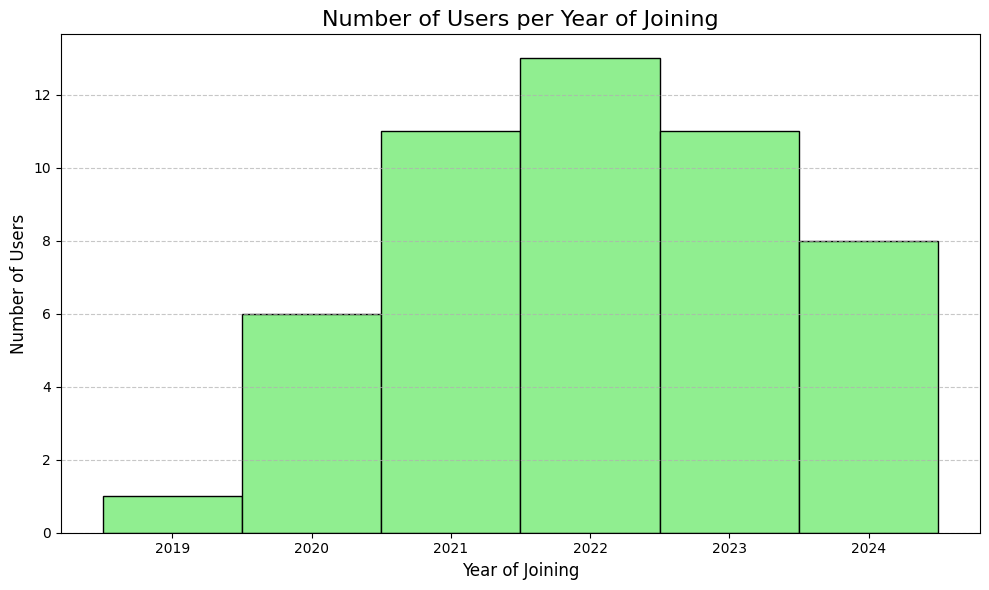

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# SQL Query to fetch year of joining for each user
query = """
SELECT YEAR(Join_date) AS JoinYear, COUNT(UserID) AS UserCount
FROM USER_INFO
GROUP BY YEAR(Join_date)
ORDER BY JoinYear
"""

try:
    # Fetch data into a pandas DataFrame
    user_data = pd.read_sql(query, connection)

    # Plotting the Histogram
    plt.figure(figsize=(10, 6))
    plt.bar(user_data['JoinYear'], user_data['UserCount'], color='lightgreen', edgecolor='black', width=1)

    # Customizing the plot
    plt.title("Number of Users per Year of Joining", fontsize=16)
    plt.xlabel("Year of Joining", fontsize=12)
    plt.ylabel("Number of Users", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the histogram
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()

except Exception as e:
    print(f"Error while fetching data or visualizing: {e}")


C:\Users\DELL\AppData\Local\Temp\ipykernel_44872\4210290895.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  user_data = pd.read_sql(query, connection)


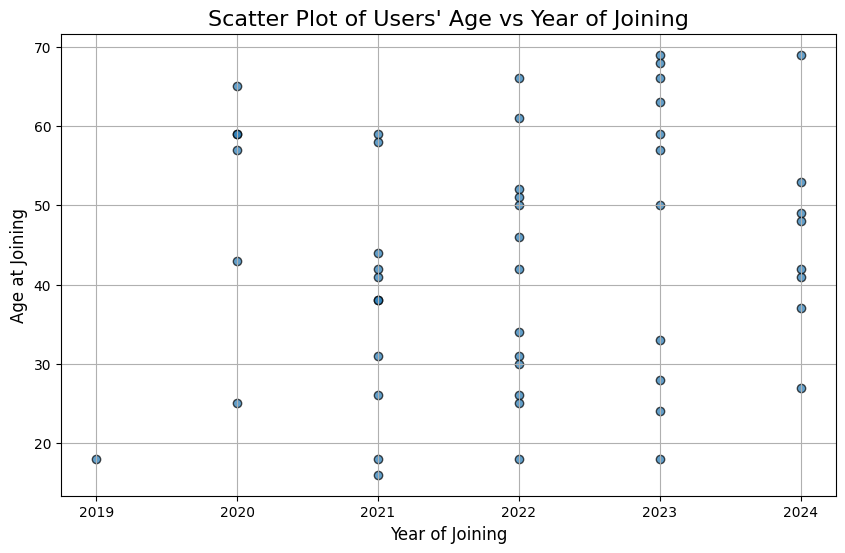

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# SQL Query to fetch users' age and year of joining
query = """
SELECT 
    YEAR(Join_date) AS JoinYear, 
    DATEDIFF(YEAR, Date_of_birth, Join_date) AS AgeAtJoining
FROM USER_INFO
WHERE Date_of_birth IS NOT NULL AND Join_date IS NOT NULL
"""

try:
    # Fetch data into a pandas DataFrame
    user_data = pd.read_sql(query, connection)

    # Plotting the Scatter Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(user_data['JoinYear'], user_data['AgeAtJoining'], alpha=0.7, edgecolors='black')

    # Customizing the plot
    plt.title("Scatter Plot of Users' Age vs Year of Joining", fontsize=16)
    plt.xlabel("Year of Joining", fontsize=12)
    plt.ylabel("Age at Joining", fontsize=12)
    plt.grid(True)

    # Display the scatter plot
    plt.show()

except Exception as e:
    print(f"Error while fetching data or visualizing: {e}")


C:\Users\DELL\AppData\Local\Temp\ipykernel_44872\2486912730.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  session_data = pd.read_sql(query, connection)


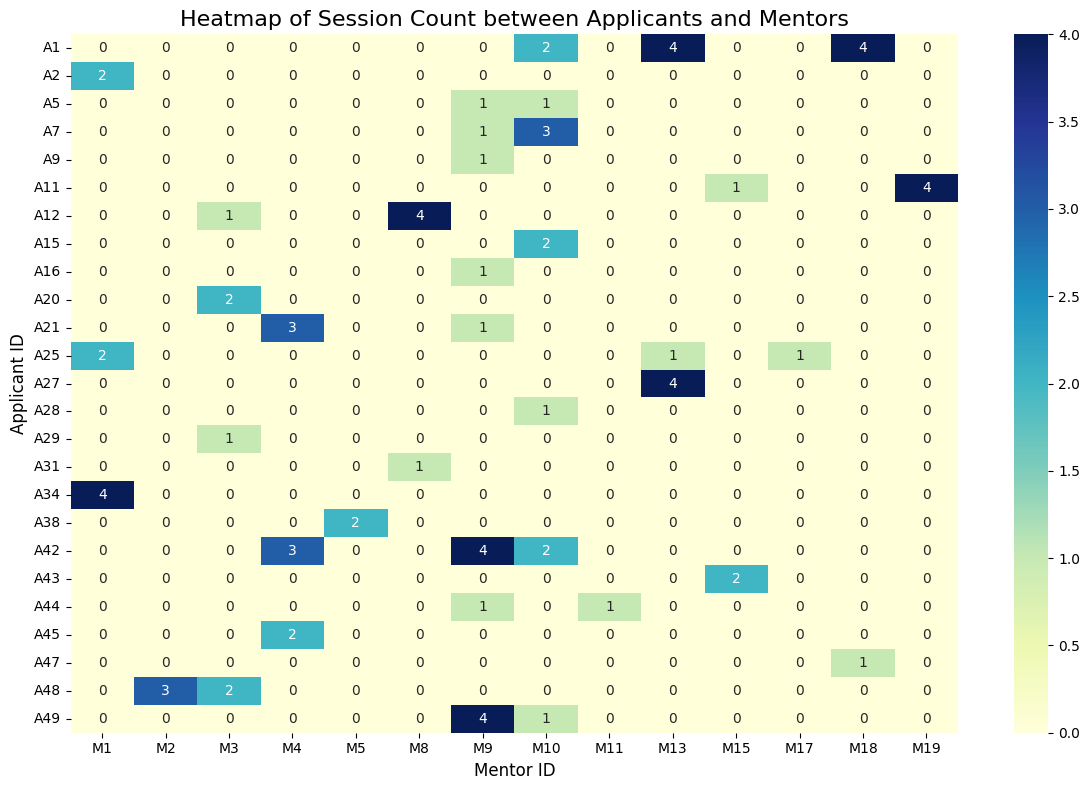

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SQL Query to fetch session count between mentors and applicants
query = """
SELECT 
    S_MentorID AS MentorID, 
    S_ApplicantID AS ApplicantID, 
    COUNT(SessionSlotID) AS SessionCount
FROM SESSION
GROUP BY S_MentorID, S_ApplicantID
"""

try:
    # Fetch data into a pandas DataFrame
    session_data = pd.read_sql(query, connection)

    # Sort the data by numeric order of MentorID and ApplicantID
    session_data['MentorID'] = session_data['MentorID'].str.extract('(\d+)').astype(int)  # Extract numeric part
    session_data['ApplicantID'] = session_data['ApplicantID'].str.extract('(\d+)').astype(int)
    session_data = session_data.sort_values(by=['MentorID', 'ApplicantID'])

    # Pivot data to create a matrix for the heatmap
    heatmap_data = session_data.pivot(index='ApplicantID', columns='MentorID', values='SessionCount').fillna(0)

    # Sort indices numerically and restore the alphanumeric format
    heatmap_data = heatmap_data.sort_index(axis=0).sort_index(axis=1)
    heatmap_data.index = [f"A{idx}" for idx in heatmap_data.index]
    heatmap_data.columns = [f"M{col}" for col in heatmap_data.columns]

    # Plotting the Heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", cbar=True)

    # Customizing the plot
    plt.title("Heatmap of Session Count between Applicants and Mentors", fontsize=16)
    plt.xlabel("Mentor ID", fontsize=12)
    plt.ylabel("Applicant ID", fontsize=12)

    # Display the heatmap
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error while fetching data or visualizing: {e}")



C:\Users\DELL\AppData\Local\Temp\ipykernel_44872\3945030014.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  mentors = set(pd.read_sql(mentors_query, connection)['UserID'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_44872\3945030014.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  applicants = set(pd.read_sql(applicants_query, connection)['UserID'])


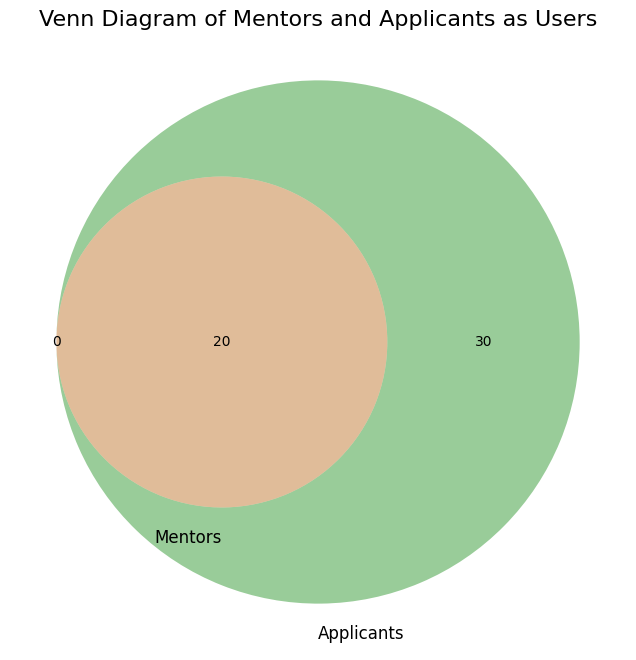

In [36]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import pandas as pd

# SQL Queries to fetch User IDs for Mentors and Applicants
mentors_query = """
SELECT DISTINCT Mentor_User_ID AS UserID
FROM MENTOR
"""

applicants_query = """
SELECT DISTINCT Applicant_User_ID AS UserID
FROM APPLICANT
"""

try:
    # Fetch data into sets
    mentors = set(pd.read_sql(mentors_query, connection)['UserID'])
    applicants = set(pd.read_sql(applicants_query, connection)['UserID'])

    # Plotting the Venn Diagram
    plt.figure(figsize=(8, 8))
    venn = venn2(subsets=(mentors, applicants), set_labels=('Mentors', 'Applicants'))

    # Customizing the plot
    plt.title("Venn Diagram of Mentors and Applicants as Users", fontsize=16)
    plt.show()

except Exception as e:
    print(f"Error while fetching data or visualizing: {e}")


C:\Users\DELL\AppData\Local\Temp\ipykernel_44872\3263204426.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Query executed successfully!


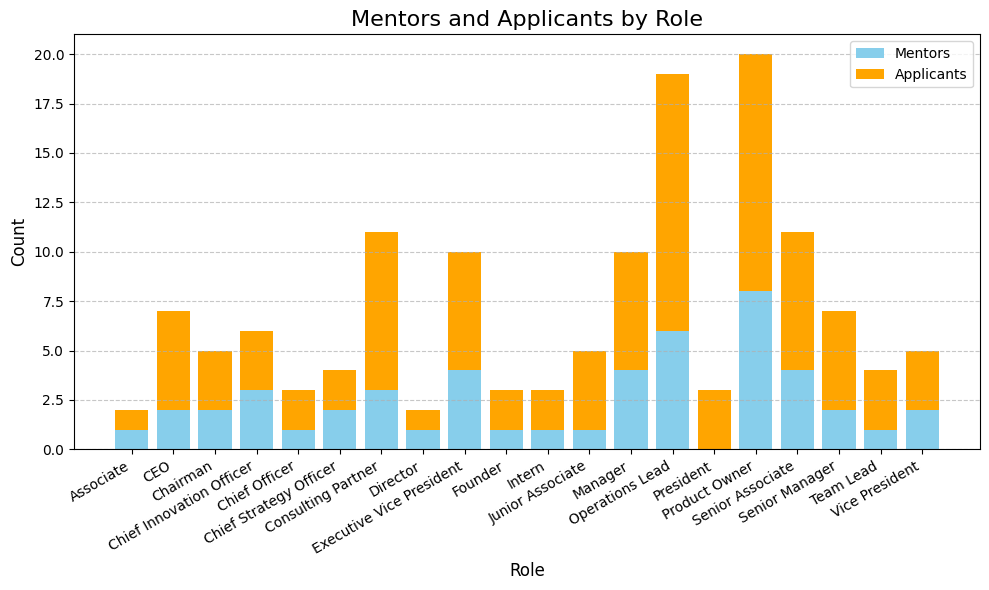

In [22]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt


# Define the query
query = """
    SELECT 
        r.RoleName,
        COUNT(CASE WHEN m.MentorID IS NOT NULL THEN 1 END) AS Mentors,
        COUNT(CASE WHEN a.ApplicantID IS NOT NULL THEN 1 END) AS Applicants
    FROM ROLE r
    LEFT JOIN DOMAIN d ON r.RoleID = d.RoleID
    LEFT JOIN MENTOR m ON d.DOM_User_ID = m.Mentor_User_ID
    LEFT JOIN APPLICANT a ON d.DOM_User_ID = a.Applicant_User_ID
    GROUP BY r.RoleName
"""

# Execute the query and load into a DataFrame
try:
    df = pd.read_sql_query(query, connection)
    print("Query executed successfully!")
except Exception as e:
    print("Failed to execute the query. Error:", str(e))
    connection.close()
    exit()


# Prepare data for plotting
x = df['RoleName']
mentors = df['Mentors']
applicants = df['Applicants']

# Plot
plt.figure(figsize=(10, 6))  # Increase the figure size for better spacing
plt.bar(x, mentors, label='Mentors', color='skyblue')
plt.bar(x, applicants, bottom=mentors, label='Applicants', color='orange')

# Chart Title and Labels
plt.title("Mentors and Applicants by Role", fontsize=16)
plt.xlabel("Role", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate and space out x-axis labels
plt.xticks(rotation=30, ha='right', fontsize=10)

# Add legend and grid
plt.legend()
plt.tight_layout()  # Adjust layout for better spacing
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_44872\3885663512.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Query executed successfully.


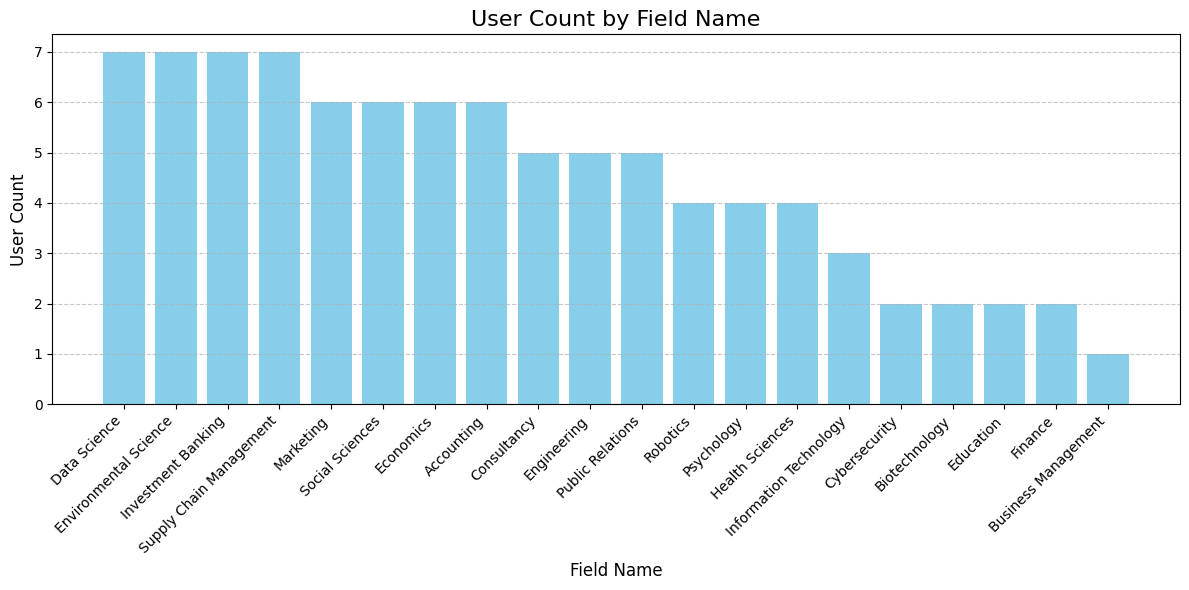

In [37]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt


# SQL query to fetch data
query = """
    SELECT FieldName, COUNT(DOM_User_ID) AS UserCount
    FROM FIELD
    LEFT JOIN DOMAIN ON FIELD.FieldID = DOMAIN.FieldID
    GROUP BY FieldName
    ORDER BY UserCount DESC;
"""

# Execute the query
try:
    df = pd.read_sql_query(query, connection)
    print("Query executed successfully.")
except Exception as e:
    print(f"Error executing query: {e}")
    connection.close()
    exit()


# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(df['FieldName'], df['UserCount'], color='skyblue')

# Adding titles and labels
plt.title("User Count by Field Name", fontsize=16)
plt.xlabel("Field Name", fontsize=12)
plt.ylabel("User Count", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


In [24]:
# Close the connection
connection.close()